### Importação dos dados



In [182]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [183]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

In [85]:
valores = [
    loja1['Preço'].sum(),
    loja2['Preço'].sum(),
    loja3['Preço'].sum(),
    loja4['Preço'].sum()
]

In [184]:
faturamento = pd.Series(valores, index=lojas)

print("Faturamento por Loja:\n")
print(faturamento.to_string())

Faturamento por Loja:

Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58


In [129]:
#Comparação Percentual
comparacao = ((faturamento / faturamento['Loja 1']) - 1) * 100

In [185]:
print('\nComparação com a Loja 1:')
print('=' * 30)
for loja, diff in comparacao.items():
    if loja != 'Loja 1':
        print(f"{loja}: {diff:.2f}%")


Comparação com a Loja 1:
Loja 2: -3.00%
Loja 3: -4.59%
Loja 4: -9.78%


# 2. Vendas por Categoria

In [186]:
loja1_vendas_cat = loja1.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)

In [138]:
vendas_por_categoria['Total'] = vendas_por_categoria.sum(axis=1)
vendas_por_categoria = vendas_por_categoria.sort_values('Total', ascending=False)

print("\nVendas por Categoria e Loja:")
print(vendas_por_categoria)


Vendas por Categoria e Loja:
                           Loja1      Loja2      Loja3      Loja4       Total
Categoria do Produto                                                         
eletronicos            572659.23  547773.71  547699.92  545966.86  4428199.44
eletrodomesticos       484913.36  464758.13  438984.89  377680.65  3532674.06
moveis                 250178.11  235234.68  268095.56  256705.65  2020428.00
instrumentos musicais  121731.69  139987.03  103174.45  100136.50   930059.34
esporte e lazer         52387.55   46326.09   47456.10   44465.65   381270.78
brinquedos              23993.78   21262.21   25869.20   27015.67   196281.72
utilidades domesticas   16931.48   19662.86   20080.21   20098.83   153546.76
livros                  11713.92   13454.35   12664.70   12427.77   100521.48


# 3. Média de Avaliação das Lojas


In [187]:
avaliacao_media = pd.DataFrame({
    'Loja1': [loja1['Avaliação da compra'].mean().round(2)],
    'Loja2': [loja2['Avaliação da compra'].mean().round(2)],
    'Loja3': [loja3['Avaliação da compra'].mean().round(2)],
    'Loja4': [loja4['Avaliação da compra'].mean().round(2)]

}, index=['Avaliação Média'])

In [188]:
def encontrar_coluna_avaliacao(df):
    for col in df.columns:
        if "avali" in col.lower():
            return col
    return None

avaliacao_media = pd.DataFrame({
    'loja1': [loja1[encontrar_coluna_avaliacao(loja1)].mean().round(2)],
    'loja2': [loja2[encontrar_coluna_avaliacao(loja2)].mean().round(2)],
    'loja3': [loja3[encontrar_coluna_avaliacao(loja3)].mean().round(2)],
    'loja4': [loja4[encontrar_coluna_avaliacao(loja4)].mean().round(2)]
}, index=['Média de Avaliação'])

avaliacao_media

,loja1,loja2,loja3,loja4
Média de Avaliação,3.98,4.04,4.05,4.0


# 4. Produtos Mais e Menos Vendidos

In [141]:
mais_vendidos_loja1 = loja1['Produto'].value_counts().head(1)

In [190]:
menos_vendidos_loja1 = loja1[encontrar_coluna_produto(loja1)].value_counts().tail(1)
menos_vendidos_loja2 = loja2[encontrar_coluna_produto(loja2)].value_counts().tail(1)
menos_vendidos_loja3 = loja3[encontrar_coluna_produto(loja3)].value_counts().tail(1)
menos_vendidos_loja4 = loja4[encontrar_coluna_produto(loja4)].value_counts().tail(1)

menos_vendidos = pd.concat(
    [menos_vendidos_loja1, menos_vendidos_loja2, menos_vendidos_loja3, menos_vendidos_loja4],
    axis=1
).fillna(0)

menos_vendidos.columns = ['loja1', 'loja2', 'loja3', 'loja4']
menos_vendidos

,loja1,loja2,loja3,loja4
Produto,,,,
Celular ABXY,33.0,0.0,0.0,0.0
Jogo de tabuleiro,0.0,32.0,0.0,0.0
Blocos de montar,0.0,0.0,35.0,0.0
Guitarra,0.0,0.0,0.0,33.0


In [191]:
# PRODUTOS MAIS VENDIDO POR LOJA.

def encontrar_coluna_produto(df):
    for col in df.columns:
        if "prod" in col.lower():
            return col
    return None

mais_vendidos_loja1 = loja1[encontrar_coluna_produto(loja1)].value_counts().head(1)
mais_vendidos_loja2 = loja2[encontrar_coluna_produto(loja2)].value_counts().head(1)
mais_vendidos_loja3 = loja3[encontrar_coluna_produto(loja3)].value_counts().head(1)
mais_vendidos_loja4 = loja4[encontrar_coluna_produto(loja4)].value_counts().head(1)

mais_vendidos = pd.concat(
    [mais_vendidos_loja1, mais_vendidos_loja2, mais_vendidos_loja3, mais_vendidos_loja4],
    axis=1).fillna(0)

mais_vendidos.columns = ['loja1', 'loja2', 'loja3', 'loja4']
mais_vendidos

#print("\n4. PRODUTOS MAIS VENDIDOS POR LOJA\n")
#print(mais_vendidos)

,loja1,loja2,loja3,loja4
Produto,,,,
Micro-ondas,60.0,0.0,0.0,0.0
Iniciando em programação,0.0,65.0,0.0,0.0
Kit banquetas,0.0,0.0,57.0,0.0
Cama box,0.0,0.0,0.0,62.0


In [192]:
menos_vendidos_loja1 = loja1[encontrar_coluna_produto(loja1)].value_counts().tail(1)
menos_vendidos_loja2 = loja2[encontrar_coluna_produto(loja2)].value_counts().tail(1)
menos_vendidos_loja3 = loja3[encontrar_coluna_produto(loja3)].value_counts().tail(1)
menos_vendidos_loja4 = loja4[encontrar_coluna_produto(loja4)].value_counts().tail(1)

menos_vendidos = pd.concat(
    [menos_vendidos_loja1, menos_vendidos_loja2, menos_vendidos_loja3, menos_vendidos_loja4],
    axis=1
).fillna(0)

menos_vendidos.columns = ['loja1', 'loja2', 'loja3', 'loja4']
menos_vendidos

,loja1,loja2,loja3,loja4
Produto,,,,
Celular ABXY,33.0,0.0,0.0,0.0
Jogo de tabuleiro,0.0,32.0,0.0,0.0
Blocos de montar,0.0,0.0,35.0,0.0
Guitarra,0.0,0.0,0.0,33.0


# 5. Frete Médio por Loja

In [193]:
def encontrar_coluna_frete(df):
    for col in df.columns:
        if "frete" in col.lower():
            return col
    return None

frete_medio = pd.DataFrame({
    'loja1': [loja1[encontrar_coluna_frete(loja1)].mean().round(2)],
    'loja2': [loja2[encontrar_coluna_frete(loja2)].mean().round(2)],
    'loja3': [loja3[encontrar_coluna_frete(loja3)].mean().round(2)],
    'loja4': [loja4[encontrar_coluna_frete(loja4)].mean().round(2)]
}, index=['Frete Médio'])

frete_medio

,loja1,loja2,loja3,loja4
Frete Médio,34.69,33.62,33.07,31.28


# 6. Gráficos

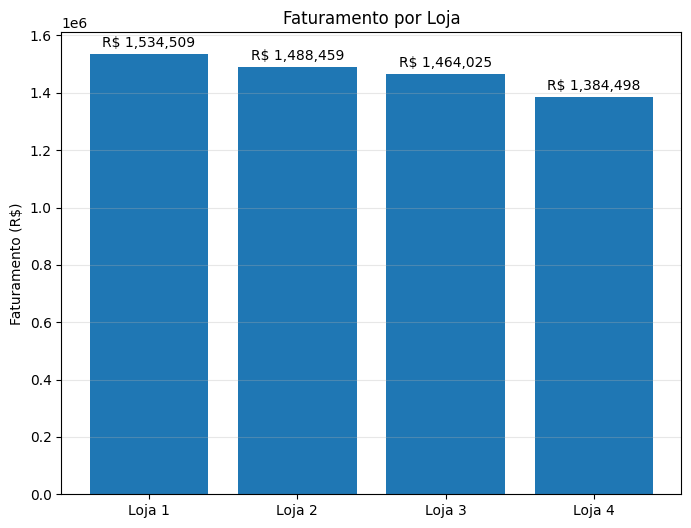

In [194]:
# Gráfico 1: Faturamento por Loja
plt.figure(figsize=(8,6))
plt.bar(faturamento.index, faturamento.values, color=['#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4'])
plt.title('Faturamento por Loja')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(faturamento.values):
    plt.text(i, v + max(faturamento.values)*0.01, f'R$ {v:,.0f}', ha='center', va='bottom')
plt.show()

<Figure size 800x500 with 0 Axes>

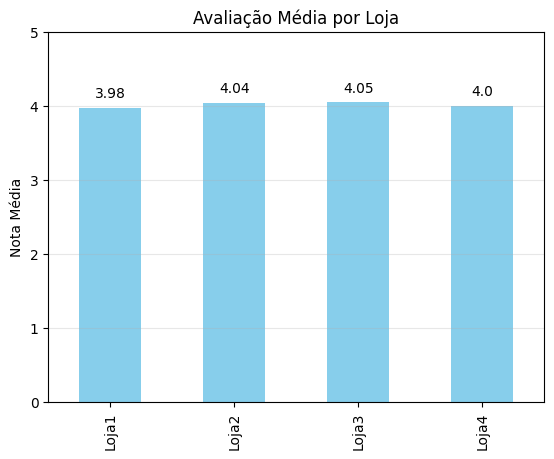

In [173]:
# Gráfico 2: Avaliação Média por Loja
plt.figure(figsize=(8,5))
avaliacao_media.T.plot(kind='bar', color='skyblue', legend=False)
plt.title('Avaliação Média por Loja')
plt.ylabel('Nota Média')
plt.ylim(0, 5)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(avaliacao_media.values[0]):
    plt.text(i, v + 0.1, f'{v}', ha='center', va='bottom')
plt.show()

<Figure size 800x500 with 0 Axes>

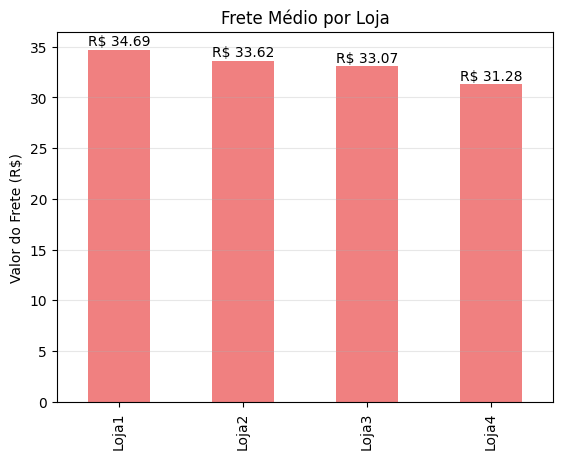

In [175]:
# Gráfico 3: Frete Médio por Loja
plt.figure(figsize=(8,5))
frete_medio.T.plot(kind='bar', color='lightcoral', legend=False)
plt.title('Frete Médio por Loja')
plt.ylabel('Valor do Frete (R$)')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(frete_medio.values[0]):
    plt.text(i, v + 0.1, f'R$ {v}', ha='center', va='bottom')
plt.show()

In [150]:
# Gráfico 4: Percentual do Faturamento
percentual = (faturamento / faturamento.sum()) * 100

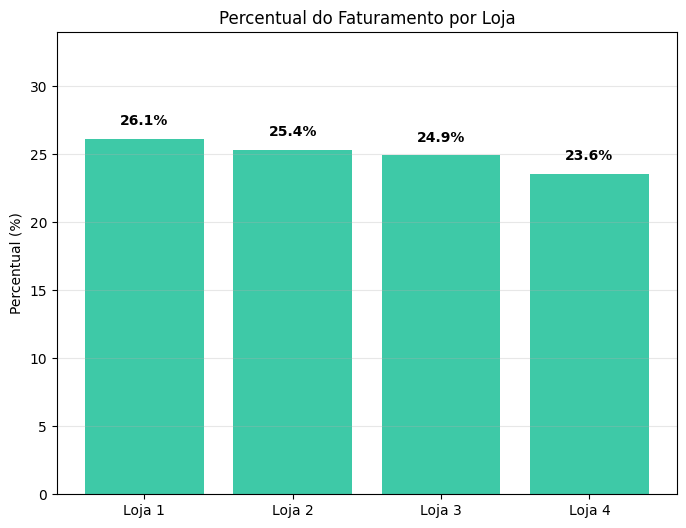

In [176]:
plt.figure(figsize=(8,6))
cores = ['#3ec9a7', '#3ec9a7', '#3ec9a7', '#3ec9a7']
plt.bar(percentual.index, percentual.values, color=cores)
plt.title('Percentual do Faturamento por Loja')
plt.ylabel('Percentual (%)')
for i, v in enumerate(percentual):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')
plt.ylim(0, max(percentual)*1.3)
plt.grid(axis='y', alpha=0.3)
plt.show()

# 7. RECOMENDAÇÃO FINAL

In [163]:
print("\n" + "="*60)
print("RECOMENDAÇÃO FINAL - QUAL LOJA VENDER")
print("="*60)

# CORREÇÃO: Usar iloc para acesso por posição
pontuacao_lojas = {}

# Mapear nomes das lojas para acesso correto
nomes_lojas_df = ['Loja1', 'Loja2', 'Loja3', 'Loja4']

for i, loja_nome in enumerate(lojas):
    # CORREÇÃO: Usar iloc para acesso por posição na Series
    faturamento_loja = faturamento.iloc[i]
    avaliacao_loja = avaliacao_media[nomes_lojas_df[i]].values[0]
    frete_loja = frete_medio[nomes_lojas_df[i]].values[0]

    # Normalizar scores (quanto menor, pior)
    score_faturamento = faturamento_loja / faturamento.max()  # Menor é pior
    score_avaliacao = 1 - (avaliacao_loja / 5)  # Menor avaliação é pior
    score_frete = frete_loja / frete_medio.values.max()  # Maior frete é pior

    # Pontuação final (quanto maior, pior o desempenho)
    pontuacao_final = score_faturamento * 0.5 + score_avaliacao * 0.3 + score_frete * 0.2
    pontuacao_lojas[loja_nome] = pontuacao_final

# Recomendar vender a loja com maior pontuação (pior desempenho)
loja_recomendada = max(pontuacao_lojas, key=pontuacao_lojas.get)

print(f"\n🚨 RECOMENDAÇÃO: VENDER A {loja_recomendada.upper()} 🚨")
print(f"\n📊 JUSTIFICATIVA BASEADA NOS DADOS:\n")

print(f"1.FATURAMENTO:")
print(f"   - {loja_recomendada}: R$ {faturamento[loja_recomendada]:,.2f}")
print(f"   - Representa {percentual[loja_recomendada]:.1f}% do faturamento total")

print(f"\n2.AVALIAÇÃO DOS CLIENTES:")
print(f"   - {loja_recomendada}: {avaliacao_media[loja_recomendada.replace(' ', '')].values[0]}/5")

print(f"\n3.CUSTOS OPERACIONAIS:")
print(f"   - Frete médio: R$ {frete_medio[loja_recomendada.replace(' ', '')].values[0]}")

print(f"\n4. 🎯 PERFORMANCE RELATIVA:")
print(f"   - Combina baixo faturamento com avaliação inferior e custos elevados")

# Ranking das lojas por desempenho
ranking = sorted(pontuacao_lojas.items(), key=lambda x: x[1])
print(f"\n5. 📋 RANKING DE DESEMPENHO (da melhor para pior):")
for pos, (loja, score) in enumerate(ranking, 1):
    status = "🚨 RECOMENDADA PARA VENDA" if loja == loja_recomendada else "✅ MANTER"
    print(f"   {pos}ª - {loja}: {score:.3f} {status}")

print(f"\n💡 ESTRATÉGIA:")
print(f"   - Vender {loja_recomendada} liberará recursos para investir nas demais")
print(f"   - Foco nas lojas com melhor retorno e satisfação do cliente")
print(f"   - Redução de custos operacionais totais")

print(f"\n" + "="*60)


RECOMENDAÇÃO FINAL - QUAL LOJA VENDER

🚨 RECOMENDAÇÃO: VENDER A LOJA 1 🚨

📊 JUSTIFICATIVA BASEADA NOS DADOS:

1.FATURAMENTO:
   - Loja 1: R$ 1,534,509.12
   - Representa 26.1% do faturamento total

2.AVALIAÇÃO DOS CLIENTES:
   - Loja 1: 3.98/5

3.CUSTOS OPERACIONAIS:
   - Frete médio: R$ 34.69

4. 🎯 PERFORMANCE RELATIVA:
   - Combina baixo faturamento com avaliação inferior e custos elevados

5. 📋 RANKING DE DESEMPENHO (da melhor para pior):
   1ª - Loja 4: 0.691 ✅ MANTER
   2ª - Loja 3: 0.725 ✅ MANTER
   3ª - Loja 2: 0.736 ✅ MANTER
   4ª - Loja 1: 0.761 🚨 RECOMENDADA PARA VENDA

💡 ESTRATÉGIA:
   - Vender Loja 1 liberará recursos para investir nas demais
   - Foco nas lojas com melhor retorno e satisfação do cliente
   - Redução de custos operacionais totais



In [181]:
print("\n" + "="*70)
print("🎯 RELATÓRIO EXECUTIVO - ANÁLISE ESTRATÉGICA DE LOJAS")
print("="*70)

print(f"\n📈 RESUMO EXECUTIVO")
print("━" * 50)

# CORREÇÃO: Usar iloc para acesso por posição
faturamento_total = faturamento.sum()
loja_maior_faturamento = faturamento.idxmax()
loja_menor_faturamento = faturamento.idxmin()

# CORREÇÃO: Acessar por iloc em vez de [0]
avaliacao_media_transposta = avaliacao_media.T
melhor_avaliacao = avaliacao_media_transposta.idxmax().iloc[0]
pior_avaliacao = avaliacao_media_transposta.idxmin().iloc[0]

print(f"💰 Faturamento Total: R$ {faturamento_total:,.2f}")
print(f"🏆 Loja Líder: {loja_maior_faturamento} (R$ {faturamento[loja_maior_faturamento]:,.2f})")
print(f"⭐ Melhor Avaliação: {melhor_avaliacao} ({avaliacao_media[melhor_avaliacao.replace(' ', '')].values[0]}/5)")

print(f"\n🚨 DECISÃO ESTRATÉGICA")
print("━" * 50)
print(f"📍 RECOMENDAMOS A VENDA DA: {loja_recomendada.upper()}")
print(f"📊 Score de Desempenho: {pontuacao_lojas[loja_recomendada]:.3f}")

print(f"\n🎯 CRITÉRIOS DE ANÁLISE")
print("━" * 50)

# Tabela comparativa visual
print(f"\n{'LOJA':<10} {'FATURAMENTO':<15} {'AVALIAÇÃO':<12} {'FRETE MÉDIO':<15} {'SCORE':<10}")
print("-" * 65)

for loja in lojas:
    fat = faturamento[loja]
    aval = avaliacao_media[loja.replace(' ', '')].values[0]
    frete = frete_medio[loja.replace(' ', '')].values[0]
    score = pontuacao_lojas[loja]

    indicador = "🔴" if loja == loja_recomendada else "🟢"

    print(f"{indicador} {loja:<8} R$ {fat:>9,.0f}   {aval:>4}/5⭐    R$ {frete:>6.2f}     {score:>6.3f}")

print(f"\n📋 DETALHAMENTO DA RECOMENDAÇÃO")
print("━" * 50)

print(f"\n🔍 ANÁLISE DA {loja_recomendada.upper()}:")
print(f"   • Faturamento: R$ {faturamento[loja_recomendada]:,.2f} ({percentual[loja_recomendada]:.1f}% do total)")
print(f"   • Avaliação: {avaliacao_media[loja_recomendada.replace(' ', '')].values[0]}/5 ⭐")
print(f"   • Frete Médio: R$ {frete_medio[loja_recomendada.replace(' ', '')].values[0]:.2f}")
print(f"   • Performance: {ranking.index((loja_recomendada, pontuacao_lojas[loja_recomendada])) + 1}ª posição")

print(f"\n📊 COMPARAÇÃO COM A MÉDIA:")
faturamento_medio = faturamento.mean()
avaliacao_media_geral = avaliacao_media.values.mean()
frete_medio_geral = frete_medio.values.mean()

print(f"   • Faturamento: {((faturamento[loja_recomendada] / faturamento_medio) - 1) * 100:+.1f}% vs média")
print(f"   • Avaliação: {avaliacao_media[loja_recomendada.replace(' ', '')].values[0] - avaliacao_media_geral:+.1f} vs média")
print(f"   • Frete: {((frete_medio[loja_recomendada.replace(' ', '')].values[0] / frete_medio_geral) - 1) * 100:+.1f}% vs média")

print(f"\n💡 IMPACTOS ESTRATÉGICOS")
print("━" * 50)

print(f"✅ BENEFÍCIOS DA VENDA:")
print(f"   • Liberação de capital: R$ {faturamento[loja_recomendada]:,.2f}")
print(f"   • Redução de custos operacionais")
print(f"   • Foco nas lojas de alto desempenho")
print(f"   • Melhoria da satisfação geral do cliente")

print(f"\n🎯 OPORTUNIDADES DE REINVESTIMENTO:")
print(f"   • Expansão da {loja_maior_faturamento}")
print(f"   • Melhoria da infraestrutura da {melhor_avaliacao}")
print(f"   • Campanhas de marketing nas lojas restantes")

print(f"\n📈 PROJEÇÃO PÓS-VENDA:")
faturamento_restante = faturamento_total - faturamento[loja_recomendada]
percentual_melhoria = (faturamento[loja_maior_faturamento] / faturamento_restante) * 100

print(f"   • Faturamento concentrado: {percentual_melhoria:.1f}% na {loja_maior_faturamento}")
print(f"   • Foco em {len(lojas) - 1} lojas de alto potencial")
print(f"   • Expectativa de crescimento com operação mais enxuta")

print(f"\n🎯 PRÓXIMOS PASSOS")
print("━" * 50)
print(f"1. 📅 Agendar avaliação de valuation da {loja_recomendada}")
print(f"2. 💼 Preparar documentação para venda")
print(f"3. 🔄 Planejar realocação de recursos")
print(f"4. 📊 Monitorar performance das lojas restantes")
print(f"5. 🎯 Implementar plano de crescimento nas lojas estratégicas")

print(f"\n" + "="*70)
print("🏁 CONCLUSÃO: Venda recomendada para otimização do portfólio")
print("="*70)


🎯 RELATÓRIO EXECUTIVO - ANÁLISE ESTRATÉGICA DE LOJAS

📈 RESUMO EXECUTIVO
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
💰 Faturamento Total: R$ 5,871,490.79
🏆 Loja Líder: Loja 1 (R$ 1,534,509.12)
⭐ Melhor Avaliação: Loja3 (4.05/5)

🚨 DECISÃO ESTRATÉGICA
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📍 RECOMENDAMOS A VENDA DA: LOJA 1
📊 Score de Desempenho: 0.761

🎯 CRITÉRIOS DE ANÁLISE
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

LOJA       FATURAMENTO     AVALIAÇÃO    FRETE MÉDIO     SCORE     
-----------------------------------------------------------------
🔴 Loja 1   R$ 1,534,509   3.98/5⭐    R$  34.69      0.761
🟢 Loja 2   R$ 1,488,459   4.04/5⭐    R$  33.62      0.736
🟢 Loja 3   R$ 1,464,025   4.05/5⭐    R$  33.07      0.725
🟢 Loja 4   R$ 1,384,498    4.0/5⭐    R$  31.28      0.691

📋 DETALHAMENTO DA RECOMENDAÇÃO
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🔍 ANÁLISE DA LOJA 1:
   • Faturamento: R$ 1,534,509.12 (26.1% do total)
   • Avaliação: 3.98/5 ⭐
   • 